# Classification and Regression Metrics

## Classification and Regression Metrics

**Classification** problems are perhaps the most common type of machine learning problem and as such there are a lots of metrics that can be used to evaluate them.

Here are some important ones:

1. Classification Accuracy
2. Log Loss
3. Area Under ROC Curve.
4. Classification Report.
5. Confusion Matrix.

### Classification Accuracy

**Classification accuracy** is the number of correct predictions made as a ratio of all predictions made.<br>

This metric is only suitable when there are an equal number of observations in each class and that all predictions and prediction errors are equally important.<br>

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import numpy as np

dataset=load_iris()

X = dataset.data
y = dataset.target
featNames=np.array(dataset.feature_names)

# Feature Scaling :

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_scaled, y, cv=kfold, scoring=scoring)
print(f"Accuracy: {results.mean()*100:.3f}% (std: {results.std():.3f})" )

Accuracy: 95.333% (std: 0.052)


### Log Loss

**Logistic loss** (or **log loss**) is a performance metric for evaluating the predictions of probabilities of membership to a given class.<br>

The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.<br>

Smaller log loss is better with 0 representing a perfect log loss.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import numpy as np

dataset=load_iris()

X = dataset.data
y = dataset.target
featNames=np.array(dataset.feature_names)

# Feature Scaling :

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_scaled, y, cv=kfold, scoring=scoring)
print(f"Log loss: {results.mean():.3f} (std: {results.std():.3f})" )

Log loss: -0.153 (std: 0.083)


### Area Under ROC Curve

**Area Under ROC Curve** (or **ROC AUC** for short) is a performance metric for binary classification problems.
<br>

An area of 1.0 represents a model that made all predictions perfectly.<br>
An area of 0.5 represents a model as good as random.<br>

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. <br>

The area under the curve is then the approximate integral under the ROC Curve.

(150, 4)
Area under the ROC curve : 0.83
AUC: 0.808 (0.194)


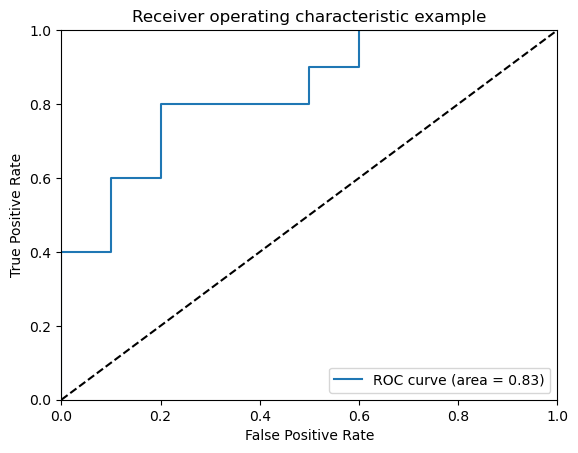

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as pl
import numpy as np

dataset=load_iris()

X = dataset.data
y = dataset.target

random_state = np.random.RandomState(0)
print(X.shape)
# Make it a binary classification problem by removing the third class
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features to make the problem harder
X = np.c_[X, random_state.randn(n_samples, 800)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Run classifier
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

classifier = svm.SVC(kernel='linear', probability=True)


probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print (f"Area under the ROC curve : {roc_auc}")

# Plot ROC curve

pl.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")

scoring = 'roc_auc'
results = model_selection.cross_val_score(classifier, X_train, y_train, cv=kfold, scoring=scoring)
print(f"AUC: {results.mean():.3f} ({results.std():.3f})")

### Classification report

A Classification report is used to measure the __quality of predictions__ from a classification algorithm. <br>
More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report.<br><br> 

- True Negative (TN): when a case was negative and predicted negative
- True Positive (TP): when a case was positive and predicted positive
- False Negative (FN): when a case was positive but predicted negative
- False Positive (FP): when a case was negative but predicted positive



In [5]:
# Classification report of Iris dataset using the SVM algorithm:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv('datasets/iris.data', names=colnames)
X = dataset.drop('Class', axis=1)
y = dataset['Class']
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
svclassifier = SVC(kernel='rbf', degree=2, gamma='auto')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=y.unique()))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



The report shows the main classification metrics: __precision__, __recall__ and __f1-score__, on a per-class basis. 

#### Precision (what percent of your predictions were correct?)

__Precision__ is the ability of a classifier not to label an instance positive that is actually negative (i.e. the accuracy of positive predictions).<br>
For each class it is defined as the ratio of true positives to the sum of true and false positives.
<br>

Precision = TP/(TP + FP)

In [6]:
from sklearn.metrics import precision_score
print(f"Precision score: {precision_score(y_test, y_pred, average='micro')}")

Precision score: 0.9777777777777777


####  Recall (What percent of the positive cases did you catch?) 

__Recall__ is the ability of a classifier to find all positive instances (i.e. the fraction of positives that were correctly identified).<br> 
For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.<br>

Recall = TP/(TP+FN)

In [7]:
from sklearn.metrics import recall_score
print(f"Recall score: {recall_score(y_test,y_pred,average='micro')}")

Recall score: 0.9777777777777777


#### F1 score (What percent of positive predictions were correct?)
 
The __F1 score__ is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. <br>
Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. <br>
As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
<br>

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [8]:
from sklearn.metrics import f1_score
print(f"F1 Score: {f1_score(y_test,y_pred,average='micro')}")

F1 Score: 0.9777777777777777


The other reported information include: <br>
- __macro average__ (averaging the unweighted mean per label), 
- __weighted average__ (averaging the support-weighted mean per label)
- __accuracy__ (the fraction of predictions our model got right: (tp+tn)/(tp+tn+fp+fn))

### Confusion Matrix

A __confusion matrix__ visualises classification accuracy and errors made by a machine learning model. <br>
They are especially useful where there are multiple classification categories. <br>
Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). 

The Scikit-Learn function __confusion_matrix()__ returns a confusion matrix and it is possible to use a plotting library to plot it if we want to.<br>

The accuracy of the model is good if the majority of the predictions fall on the diagonal line of the matrix (which are correct predictions).

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


Text(0.5, 1.0, 'Confusion Matrix')

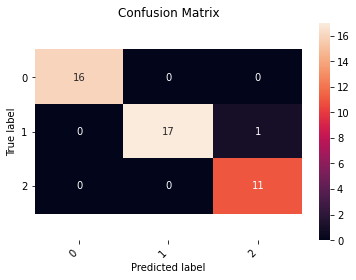

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

hmap=sns.heatmap(cnf_matrix, annot=True, fmt='d')
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=45, ha='right')
bottom, top = hmap.get_ylim() # to correct a bug with matplotlib 3.1.1
hmap.set_ylim(bottom + 0.5, top - 0.5) # to correct a bug with matplotlib 3.1.1

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

## Regression Error Metrics

The quality of a __regression model__ is how well its predictions match up against actual values.
<br>
Several error metrics exist to judge the quality of a model and enable us to compare regresssions against other regressions with different parameters:<br>

- Mean Absolute Error (MAE)
- Mean Square Error (MSE)
- Root Mean Squared Error (RMSE)
- Root Squared Error (R^2)


### Mean absolute error

The __mean absolute error (MAE)__ calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out, and then take the average of all these residuals.<br>
The picture below is a graphical description of the MAE. The green line represents our model’s predictions, and the blue points represent our data.

<img src="nbimages/mae.jpg" alt="Mean Absolute Error" title="MAE" width=400 height=400 />

A small MAE (compared to the feature range) suggests the model is great at prediction (0 means that your model is a perfect predictor), while a large MAE suggests that your model may have trouble in certain areas.<br>

**Caveat**: `cross_val_score()` reports scores in ascending order (largest score is best). But MAE is naturally descending scores (the smallest score is best). Thus we need to use `neg_mean_absolute_error` to invert the sorting. This also results in the score to be negative even though the value can never be negative.


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Loading the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

df=df.dropna() # They are lines that contains multiple NaN values that should be removed
df.reset_index(drop=True, inplace=True)

print(df.info())
X = df.iloc[:,0:10]   #Independent variable Dataframe
print(X.head())

y = df[10]      #Target Variable (MEDV: Median value of owner-occupied homes in $1000's)
print(y.head())

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = DecisionTreeRegressor()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"MAE: {results.mean():.3f} ({results.std():.3f})")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
dtypes: float64(11)
memory usage: 43.6 KB
None
         0     1     2    3      4      5     6       7    8      9
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0
4  0.06905   0.0  2.18  0.0

### Mean square error

The __mean square error (MSE)__ is just like the MAE, but squares the difference before summing them all instead of using the absolute value.<br> 
Since the errors are squared before they are averaged, the MSE gives a relatively high weight to large errors. This means the RMSE should be more used when large errors are particularly undesirable. <br><br>
__Note__: outliers in the data will contribute to much higher total error in the MSE than they would in the MAE.<br>

**Caveat**: this metric is inverted by the `cross_val_score()` function.

In [36]:
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"MSE: {results.mean():.3f} ({results.std():.3f})")

MSE: -0.588 (0.495)


### Root Mean square error

The __root mean squared error (RMSE)__ is the square root of the MSE. <br>
Because the MSE is squared, its units do not match that of the original output. RMSE converts the error metric back into similar units, making interpretation easier. <br>
Since the MSE and RMSE both square the residual, they are similarly affected by outliers. <br>
The RMSE is analogous to the standard deviation (MSE to variance) and is a measure of how large your residuals are spread out.<br>

**Caveat**: this metric is inverted by the `cross_val_score()` function.

In [37]:
scoring = 'neg_root_mean_squared_error'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"RMSE: {results.mean():.3f} ({results.std():.3f})")

RMSE: -0.701 (0.357)


### R^2 Metric

The **R^2** (or **R Squared**) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination.<br>

This is a value between 0 and 1 for no-fit and perfect fit respectively.

In [38]:
scoring = 'r2'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"R^2: {results.mean():.3f} ({results.std():.3f})")

R^2: 0.844 (0.112)
